In [2]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# import data

data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(36, 2)


In [4]:
# View data dictionary
data_dict.style

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


### Drop Columns

#### drop unneeded columns

In [5]:
# drop dublicated rows
print ('before drop dublicates: ', data.shape)
data.drop_duplicates(inplace=True)
print ('after drop dublicates: ', data.shape)

before drop dublicates:  (69999, 172)
after drop dublicates:  (69999, 172)


In [6]:
# drop id column
data.drop(columns=['id'],inplace=True)

#### Define custom info function

In [7]:
# display columns with the highest number of missing values 

def more_info(dt):
    zeros_data = pd.DataFrame(dt.isin([0]).mean()*100)[dt.isin([0]).mean()*100>0].rename(columns={0:'zero values'})
    missing_data = pd.DataFrame(dt.isnull().mean()*100)[dt.isnull().mean()*100>0].rename(columns={0:'% missing values'})
    dtype_data = pd.DataFrame(dt.dtypes).rename(columns={0:'data type'})
    unique_data = pd.DataFrame(dt.nunique()).rename(columns={0:'uniques'})
    mode_data = pd.DataFrame(dt.mode()).transpose().rename(columns={0:'mode'})
    mode_percent = pd.DataFrame(pd.Series({i: len(data[data[i] == 0])/len(data)*100 for i in data})).rename(columns={0:'mode %'})
    info_data = pd.concat([ zeros_data, missing_data, dtype_data, unique_data, mode_data, mode_percent], axis=1)
    return info_data

#### Analyze zero values

In [8]:
# view data info
display(more_info(data)[more_info(data)['zero values']>0].sort_values(by='zero values', ascending=False).head(20).style)

# # Drop columns with over 90% zero values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'zero values']> 90], inplace=True)
print ('After dropping columns: ', data.shape)
 
# review data info
display(more_info(data)[more_info(data)['zero values']>0].sort_values(by='zero values', ascending=False).head(20))

,zero values,% missing values,data type,uniques,mode,mode %
loc_og_t2o_mou,98.997129,1.002871,float64,1,0.000000,98.997129
loc_ic_t2o_mou,98.997129,1.002871,float64,1,0.000000,98.997129
std_og_t2o_mou,98.997129,1.002871,float64,1,0.000000,98.997129
std_ic_t2o_mou_7,96.161374,3.838626,float64,1,0.000000,96.161374
std_og_t2c_mou_7,96.161374,3.838626,float64,1,0.000000,96.161374
std_ic_t2o_mou_6,96.045658,3.954342,float64,1,0.000000,96.045658
std_og_t2c_mou_6,96.045658,3.954342,float64,1,0.000000,96.045658
sachet_3g_7,95.859941,nan,int64,26,0,95.859941
sachet_3g_6,95.841369,nan,int64,23,0,95.841369
og_others_7,95.818512,3.838626,float64,148,0.000000,95.818512


Before dropping columns:  (69999, 171)
After dropping columns:  (69999, 148)


,zero values,% missing values,data type,uniques,mode,mode %
churn_probability,89.811283,NaN,int64,2,0,89.811283
sachet_2g_6,87.118387,NaN,int64,30,0,87.118387
sachet_2g_7,86.682667,NaN,int64,33,0,86.682667
sachet_2g_8,85.926942,NaN,int64,32,0,85.926942
spl_ic_mou_7,85.521222,3.838626,float64,103,0.0,85.521222
vol_3g_mb_6,85.439792,NaN,float64,9768,0.0,85.439792
std_og_t2f_mou_7,85.371220,3.838626,float64,1991,0.0,85.371220
jun_vbc_3g,84.922642,NaN,float64,9617,0.0,84.922642
vol_3g_mb_7,84.621209,NaN,float64,10296,0.0,84.621209
std_og_t2f_mou_6,84.401206,3.954342,float64,2074,0.0,84.401206


#### analyze missing values

In [9]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

# Drop columns with over 70% missing values
print ('Before dropping columns: ', data.shape)
data_info = more_info(data)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'% missing values']> 70], inplace=True)
print ('After dropping columns: ', data.shape)
 
# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='% missing values', ascending=False).head(35))

,zero values,% missing values,data type,uniques,mode,mode %
night_pck_user_6,24.463207,74.902499,float64,2,0.0,24.463207
total_rech_data_6,NaN,74.902499,float64,36,1.0,0.000000
count_rech_2g_6,5.921513,74.902499,float64,30,1.0,5.921513
fb_user_6,2.100030,74.902499,float64,2,1.0,2.100030
av_rech_amt_data_6,NaN,74.902499,float64,792,154.0,0.000000
arpu_2g_6,6.585808,74.902499,float64,5389,0.0,6.585808
date_of_last_rech_data_6,NaN,74.902499,object,30,6/30/2014,0.000000
count_rech_3g_6,15.743082,74.902499,float64,23,0.0,15.743082
max_rech_data_6,NaN,74.902499,float64,47,154.0,0.000000
arpu_3g_6,10.881584,74.902499,float64,5506,0.0,10.881584


Before dropping columns:  (69999, 148)
After dropping columns:  (69999, 118)


,zero values,% missing values,data type,uniques,mode,mode %
std_og_t2f_mou_8,83.968342,5.290076,float64,1945,0.0,83.968342
std_ic_t2f_mou_8,74.172488,5.290076,float64,2583,0.0,74.172488
spl_og_mou_8,48.152116,5.290076,float64,3848,0.0,48.152116
std_ic_t2t_mou_8,53.669338,5.290076,float64,5367,0.0,53.669338
loc_og_t2c_mou_8,73.483907,5.290076,float64,2204,0.0,73.483907
spl_ic_mou_8,82.911184,5.290076,float64,95,0.0,82.911184
std_og_t2t_mou_8,52.160745,5.290076,float64,14483,0.0,52.160745
loc_og_t2f_mou_8,55.656509,5.290076,float64,3311,0.0,55.656509
loc_ic_t2t_mou_8,11.484450,5.290076,float64,11446,0.0,11.484450
loc_og_t2m_mou_8,9.200131,5.290076,float64,17616,0.0,9.200131


#### analyze unique values

In [10]:
# view data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))

# Drop columns with ony 1 unique value
data_info = more_info(data)
print ('Before dropping columns: ', data.shape)
data.drop(columns=[i for i in data_info.index if data_info.loc[i,'uniques'] == 1], inplace=True)
print ('After dropping columns: ', data.shape)

# review data info
display(more_info(data)[more_info(data)['% missing values']>0].sort_values(by='uniques').head(15))


,zero values,% missing values,data type,uniques,mode,mode %
last_date_of_month_8,NaN,1.047158,object,1,8/31/2014,0.000000
last_date_of_month_7,NaN,0.570008,object,1,7/31/2014,0.000000
date_of_last_rech_6,NaN,1.572880,object,30,6/30/2014,0.000000
date_of_last_rech_8,NaN,3.515765,object,31,8/31/2014,0.000000
date_of_last_rech_7,NaN,1.762882,object,31,7/31/2014,0.000000
spl_ic_mou_6,75.156788,3.954342,float64,78,0.0,75.156788
spl_ic_mou_8,82.911184,5.290076,float64,95,0.0,82.911184
spl_ic_mou_7,85.521222,3.838626,float64,103,0.0,85.521222
og_others_6,79.091130,3.954342,float64,914,0.0,79.091130
ic_others_6,73.836769,3.954342,float64,1523,0.0,73.836769


Before dropping columns:  (69999, 118)
After dropping columns:  (69999, 114)


,zero values,% missing values,data type,uniques,mode,mode %
date_of_last_rech_6,NaN,1.572880,object,30,6/30/2014,0.000000
date_of_last_rech_8,NaN,3.515765,object,31,8/31/2014,0.000000
date_of_last_rech_7,NaN,1.762882,object,31,7/31/2014,0.000000
spl_ic_mou_6,75.156788,3.954342,float64,78,0.0,75.156788
spl_ic_mou_8,82.911184,5.290076,float64,95,0.0,82.911184
spl_ic_mou_7,85.521222,3.838626,float64,103,0.0,85.521222
og_others_6,79.091130,3.954342,float64,914,0.0,79.091130
ic_others_6,73.836769,3.954342,float64,1523,0.0,73.836769
ic_others_8,72.943899,5.290076,float64,1565,0.0,72.943899
ic_others_7,76.786811,3.838626,float64,1658,0.0,76.786811


#### Analyze object data type

In [11]:
data_info = more_info(data)

# preview all data types
display(data_info.groupby(by='data type').count())

# preview object data type
display(data_info[data_info['data type'] == 'object'])

# preview unique object values
object_cols = list(data_info[data_info['data type'] == 'object'].index)
object_data = data[object_cols]

# code gotten from https://stackoverflow.com/questions/47933213/list-unique-values-in-a-pandas-dataframe
object_uniq_vals = pd.DataFrame(pd.Series({i: object_data[i].unique() for i in object_data})).rename(columns={0:'unique values'})
# object_uniq_vals = pd.DataFrame({i: object_data[i].unique() for i in object_data.index}).rename(columns={0:'unique values'})
display(object_uniq_vals.style)

# preview values from object data types
display(data[data_info[data_info['data type'] == 'object'].index].head())

# store object columns' names

# display(data[data_info[data_info['data type'] == 'object'].index].groupby([data_info['data type'] == 'object']))

# data.groupby(['date_of_last_rech_6', 'date_of_last_rech_7']).nunique()



,zero values,% missing values,uniques,mode,mode %
data type,,,,,
int64,16,0,17,17,17
float64,94,76,94,94,94
object,0,3,3,3,3


,zero values,% missing values,data type,uniques,mode,mode %
date_of_last_rech_6,NaN,1.572880,object,30,6/30/2014,0.0
date_of_last_rech_7,NaN,1.762882,object,31,7/31/2014,0.0
date_of_last_rech_8,NaN,3.515765,object,31,8/31/2014,0.0


,unique values
date_of_last_rech_6,['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014' '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014' '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014' '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014' '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014']
date_of_last_rech_7,['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014' '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014' '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014' '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014' '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014' '7/2/2014' '7/3/2014']
date_of_last_rech_8,['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014' '8/5/2014' '8/27/2014' '8/16/2014' '8/21/2014' '8/22/2014' '8/23/2014' nan '8/15/2014' '8/31/2014' '8/12/2014' '8/10/2014' '8/29/2014' '8/20/2014' '8/13/2014' '8/18/2014' '8/11/2014' '8/14/2014' '8/6/2014' '8/9/2014' '8/8/2014' '8/17/2014' '8/7/2014' '8/1/2014' '8/4/2014' '8/2/2014' '8/3/2014']


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/22/2014,7/10/2014,8/24/2014
1,6/12/2014,7/10/2014,8/26/2014
2,6/11/2014,7/22/2014,8/24/2014
3,6/15/2014,7/21/2014,8/25/2014
4,6/25/2014,7/26/2014,8/30/2014


In [12]:

# # print ('Before drop dublicates: ', object_data.shape)
# # display (object_data.head(10))
# # object_data.drop_duplicates(inplace=True)
# # print ('After drop dublicates: ', object_data.shape)
# # display (object_data.head(10))

# # display (object_data['date_of_last_rech_6'].unique())
# object_data_uniq =pd.DataFrame(pd.Series({i: object_data[i].unique() for i in object_data})).rename(columns={0:'unique values'})

# display(object_data_uniq.style)

<i> All of the object data types are date data from June, July, and August of 2014

In [13]:
# change object columns to datetime
data[object_cols] = data[object_cols].apply(pd.to_datetime)

# review object data after changing data type
print('object data after data type transform:')
display(more_info(data).loc[object_cols,:])
display(data[object_cols].head())

object data after data type transform:


,zero values,% missing values,data type,uniques,mode,mode %
date_of_last_rech_6,NaN,1.572880,datetime64[ns],30,2014-06-30 00:00:00,0.0
date_of_last_rech_7,NaN,1.762882,datetime64[ns],31,2014-07-31 00:00:00,0.0
date_of_last_rech_8,NaN,3.515765,datetime64[ns],31,2014-08-31 00:00:00,0.0


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,2014-06-22,2014-07-10,2014-08-24
1,2014-06-12,2014-07-10,2014-08-26
2,2014-06-11,2014-07-22,2014-08-24
3,2014-06-15,2014-07-21,2014-08-25
4,2014-06-25,2014-07-26,2014-08-30


#### split data into train & test set

In [14]:
# Identify the dependent and independent variables separately
X = data.drop(columns = ['churn_probability'])
y = data['churn_probability']

X.shape, y.shape

((69999, 113), (69999,))

In [15]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 113), (14000, 113), (55999,), (14000,))

#### Drop rows with the highest number of null values

In [16]:
# # generate a summary table with the percentage of nulls in a row.
# null_rows = pd.DataFrame(X_train.isna().mean(axis=1).sort_values(ascending=False)).rename(columns={0:'% of nulls in a row'})
# null_rows = pd.DataFrame(null_rows.iloc[:,0].value_counts())
# null_rows['count %'] = null_rows['count']/ len(X_train) *100
# null_rows.sort_index(inplace=True)

# # import reduce function
# from functools import reduce

# # Create accumulating column
# count_accum = [reduce(lambda x, y: x+y, null_rows.iloc[0:i,1].to_list()) for i in range(1, len(null_rows)+1)]
# null_rows['count % accumulate'] = count_accum
# # display the table
# display(null_rows)



- The table shows the quantity of each percentage of nulls in the data row.
- Drop rows that have more than 60% of null values.

In [17]:
# # Drop rows that have more than 60% of null values
# print('Before droping rows: ', X_train.shape)
# X_train = X_train[X_train.isna().mean(axis=1)<0.6]
# print('After dropping rows: ', X_train.shape)

#### Imputation of missing values

- Most data contains zeros, therefore treat missing data as 0.
- Missing recharge dates indicate no recharge event. 
- As a result, replace all missing data with 0 values.

In [18]:
# data.replace({np.nan:0}, inplace=True)
# print('Missing values after imputation:', more_info(data)['% missing values'].count())

In [19]:
# mode_data = pd.DataFrame(columns=['column', 'mode', 'percentage'])
# for i in data:
#     # len(data[data['i'] == data['i'].mode()])/len(data)*100
#     new_row = {'column':i, 'mode':data[i].mode().values.item(), 'percentage':len(data[data[i] == 0])/len(data)*100}
#     # mode_data.append(new_row, ignore_index=True, inplace=True)
#     mode_data.loc[len(mode_data)] = new_row

# display(mode_data.sort_values(by='percentage', ascending=False).style)

In [20]:
# more_info(data).sort_values(by='mode %', ascending=False).style


In [21]:
# data.describe(include='all').transpose().style

### Visualize missing values pattern

In [22]:
# investigate distinct proportion of missing values
data_info = more_info(X_train)
data_info.reset_index(names='columns', inplace=True)
missing_uniq_vals = data_info.groupby(['% missing values'])['columns'].apply(list).reset_index(name='unique columns')
display(missing_uniq_vals.style)

,% missing values,unique columns
0,1.587528,['date_of_last_rech_6']
1,1.708959,['date_of_last_rech_7']
2,3.507205,['date_of_last_rech_8']
3,3.864355,"['onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']"
4,3.973285,"['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']"
5,5.323309,"['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']"


- The proportion of missing values is consistent across groups of columns
- Visualize the  distribution of missing values for each group

<Axes: >

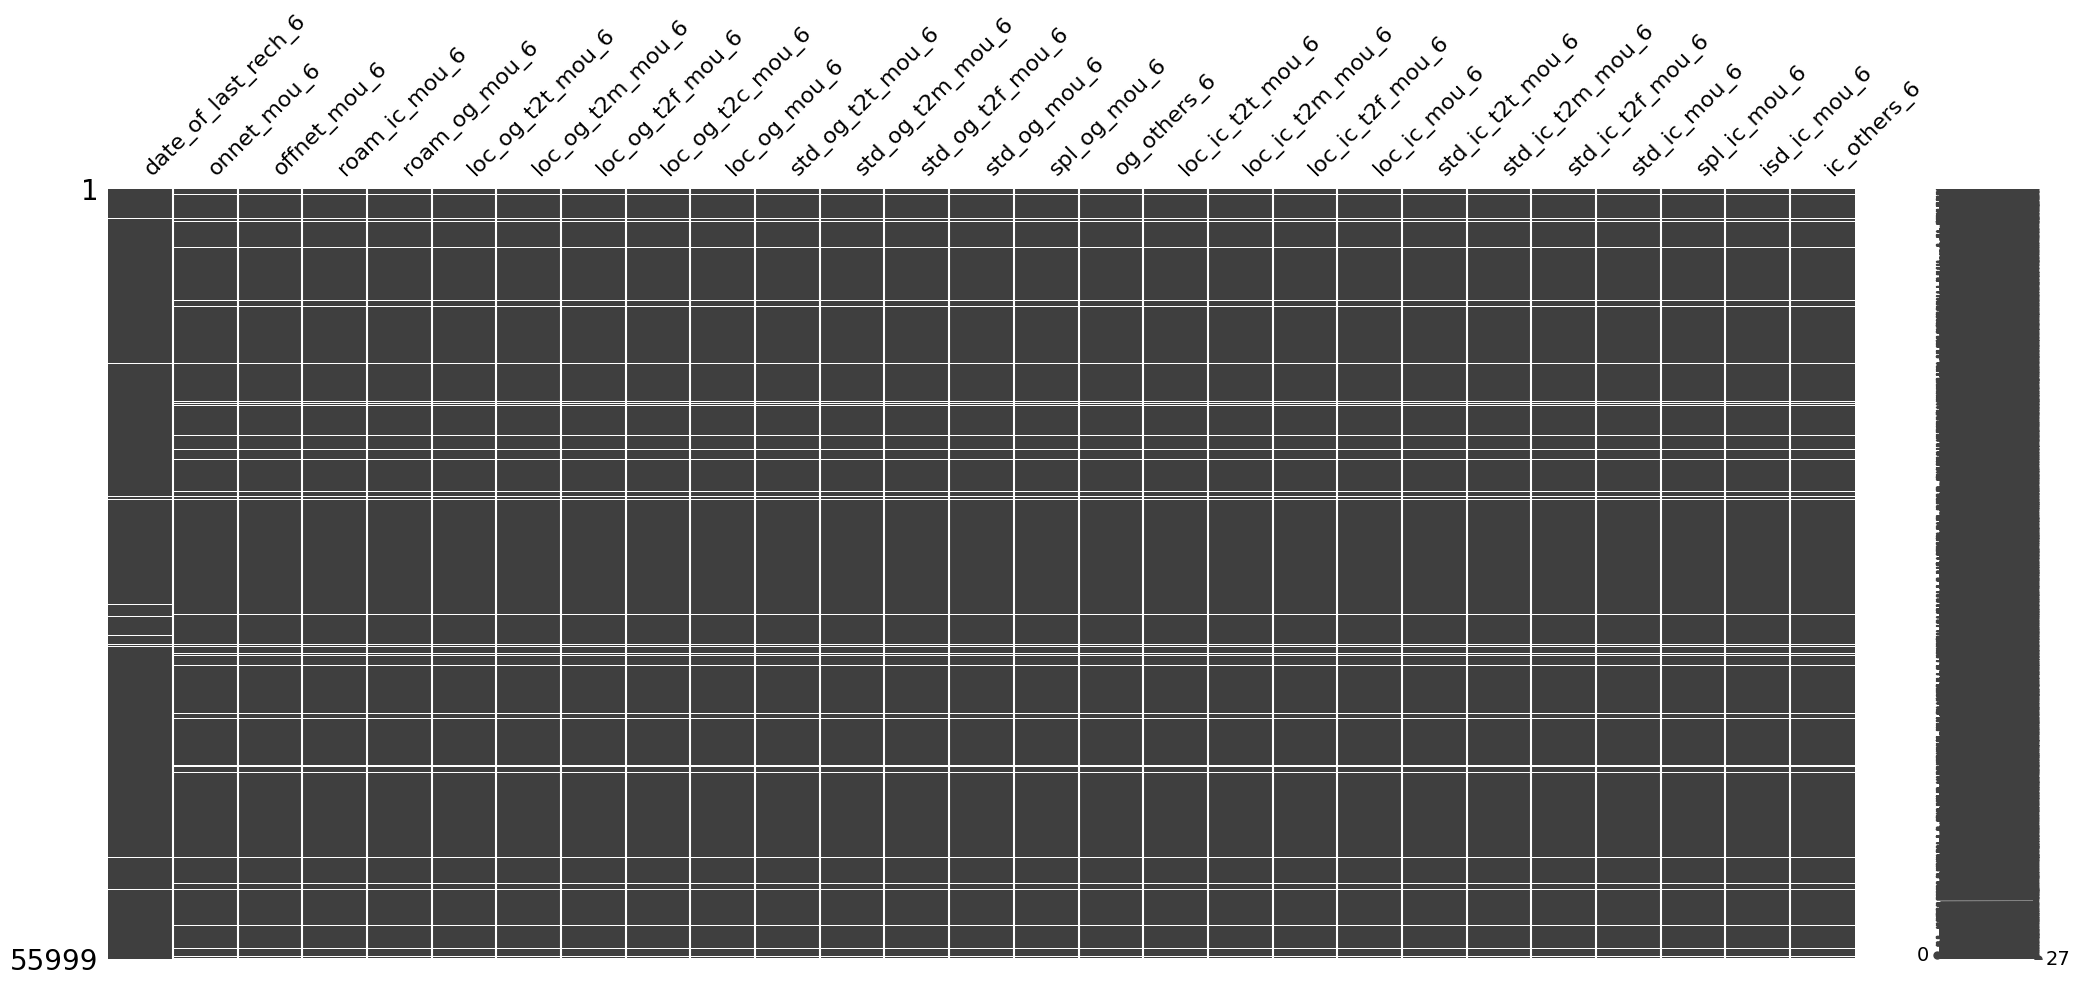

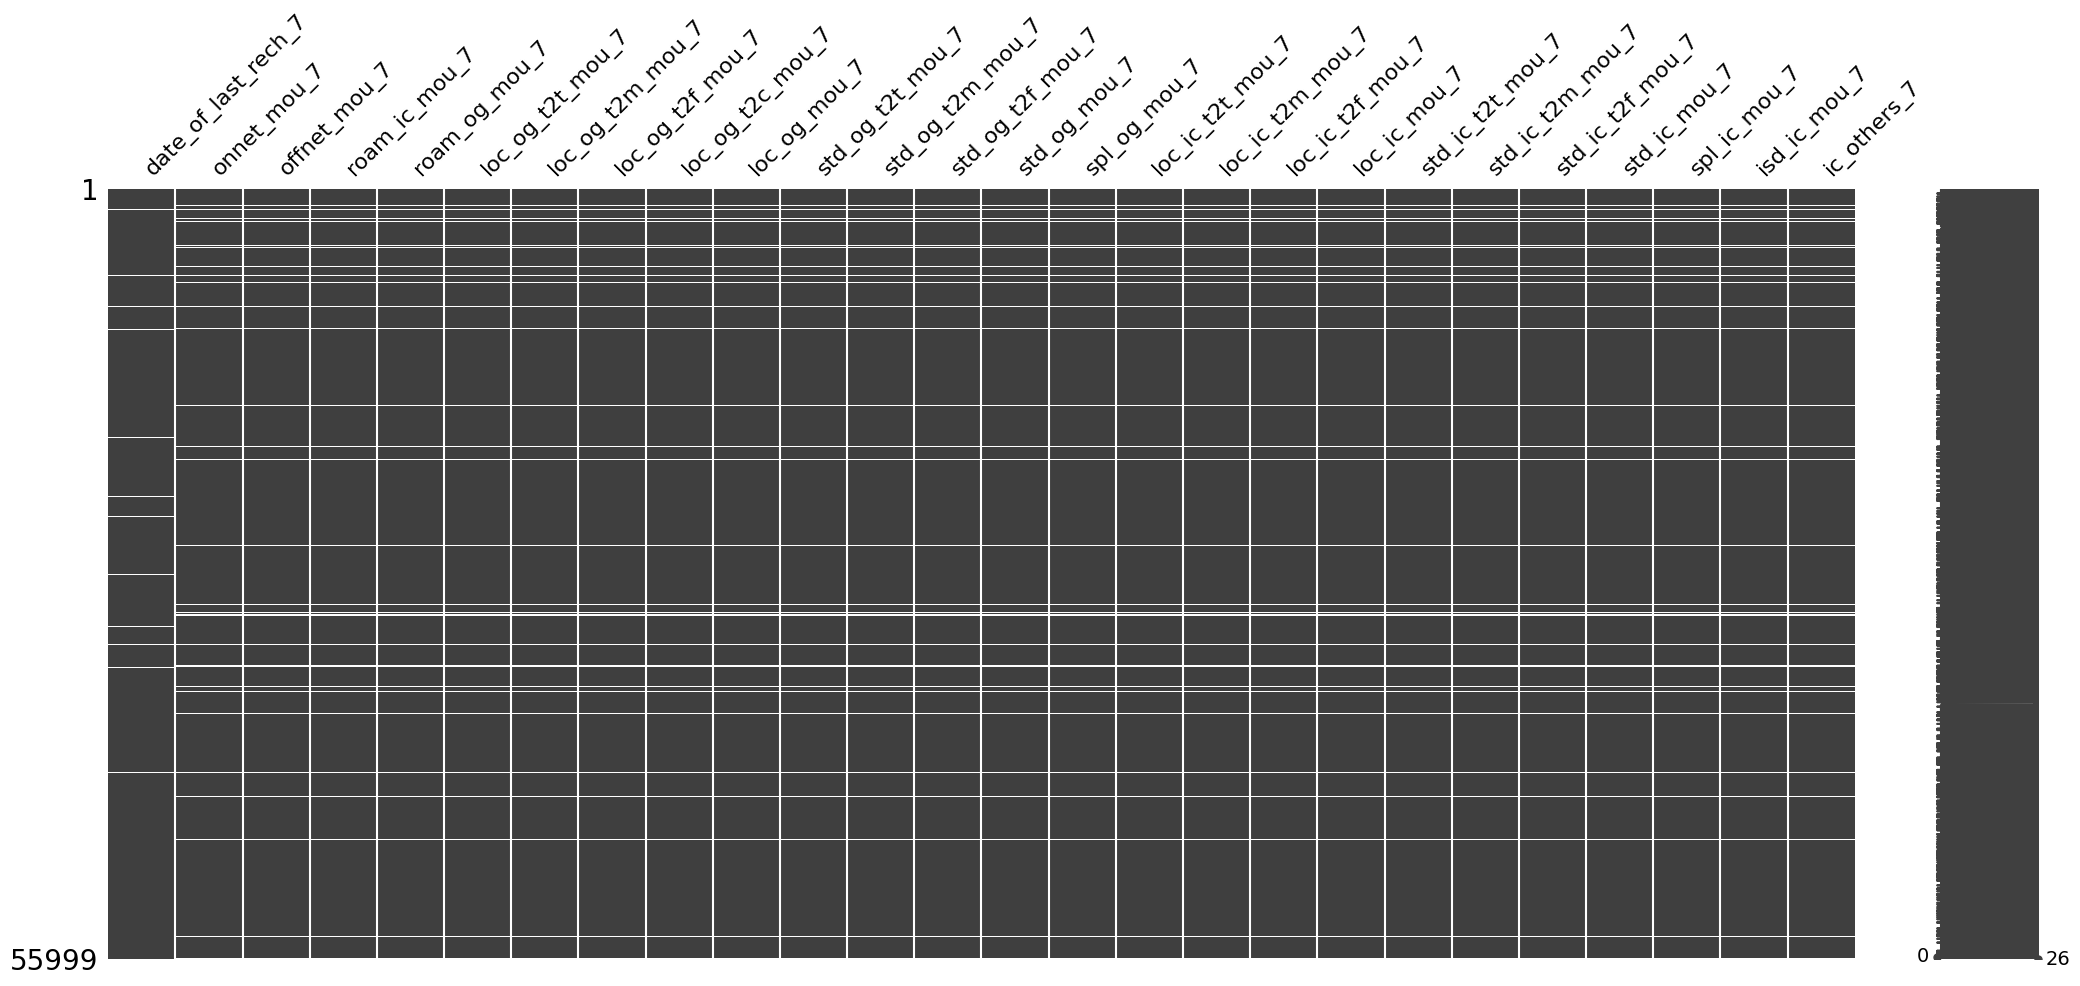

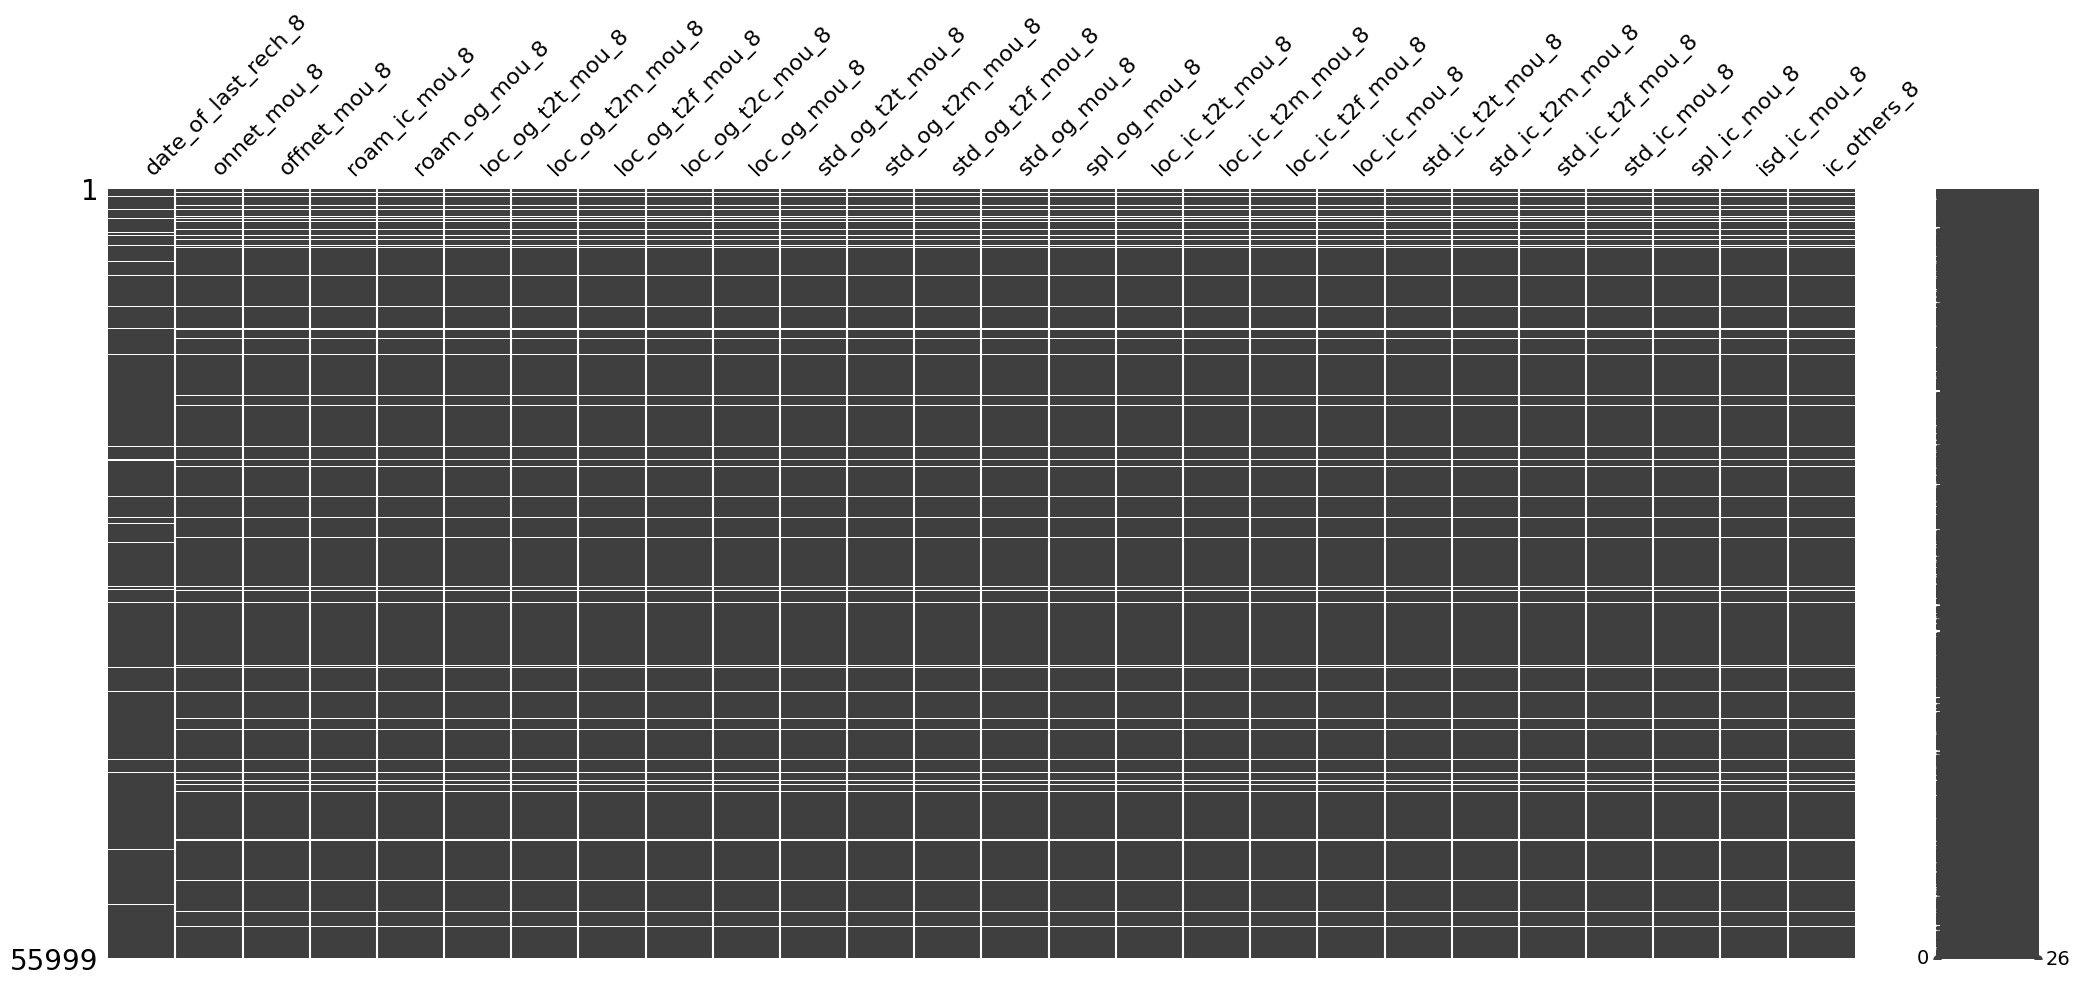

In [ ]:
# get a list of missing values' columns
null_cols = []
for i in missing_uniq_vals.index:
    null_cols.extend(missing_uniq_vals.iloc[i,1])

# Visualize the distribution of missing values for variables within the same month.
    
### For installing missingno library, type this command in terminal
#pip install missingno
import missingno as msno

# June of 2014
msno.matrix(X_train[[i for i in null_cols if re.search(r'6$',i)]])

# July of 2014
msno.matrix(X_train[[i for i in null_cols if re.search(r'7$',i)]])

# August of 2014
msno.matrix(X_train[[i for i in null_cols if re.search(r'8$',i)]])



- There are no connections between date_last_rech and the other variables in the month.
- The missing pattern occur as a whole for each month.
- The collection's data type solely consists of minutes of phone call usage.

#### Investigate date_of_last_rech missing pattern

<Axes: >

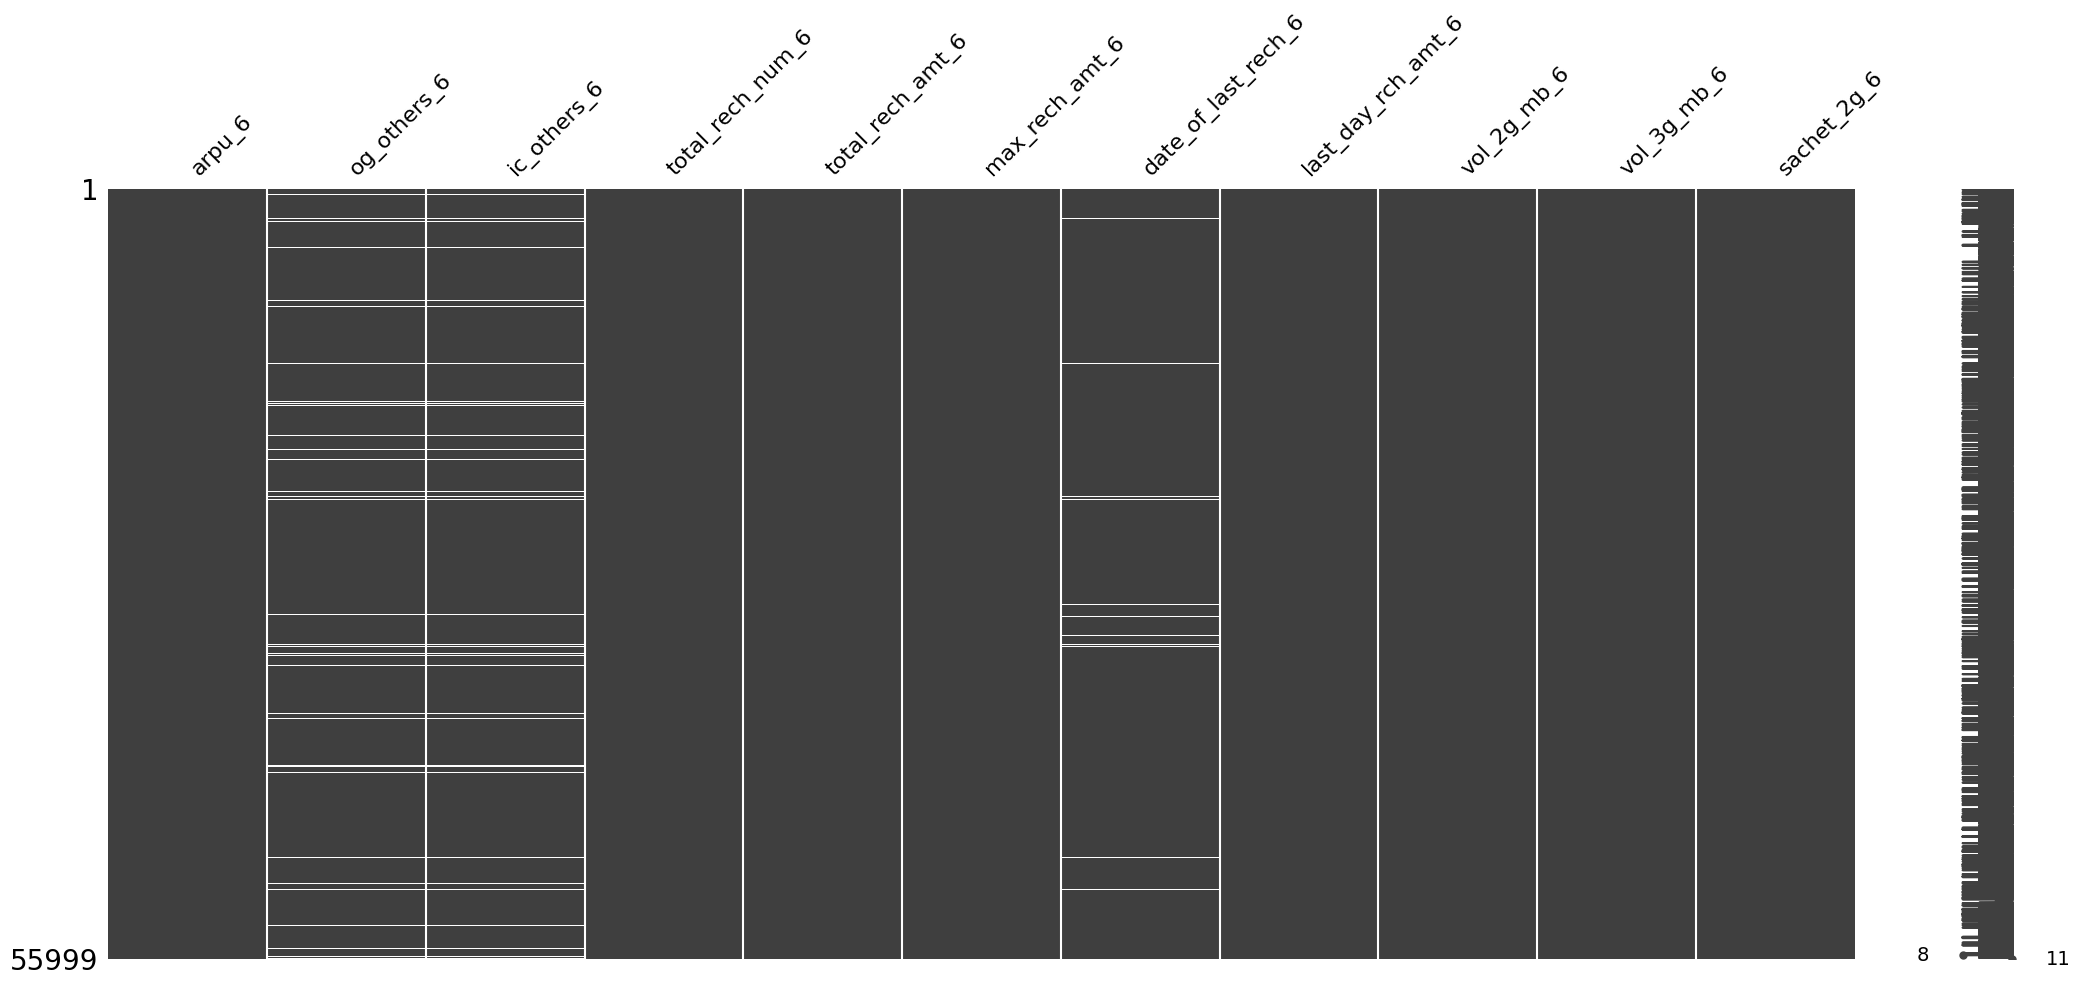

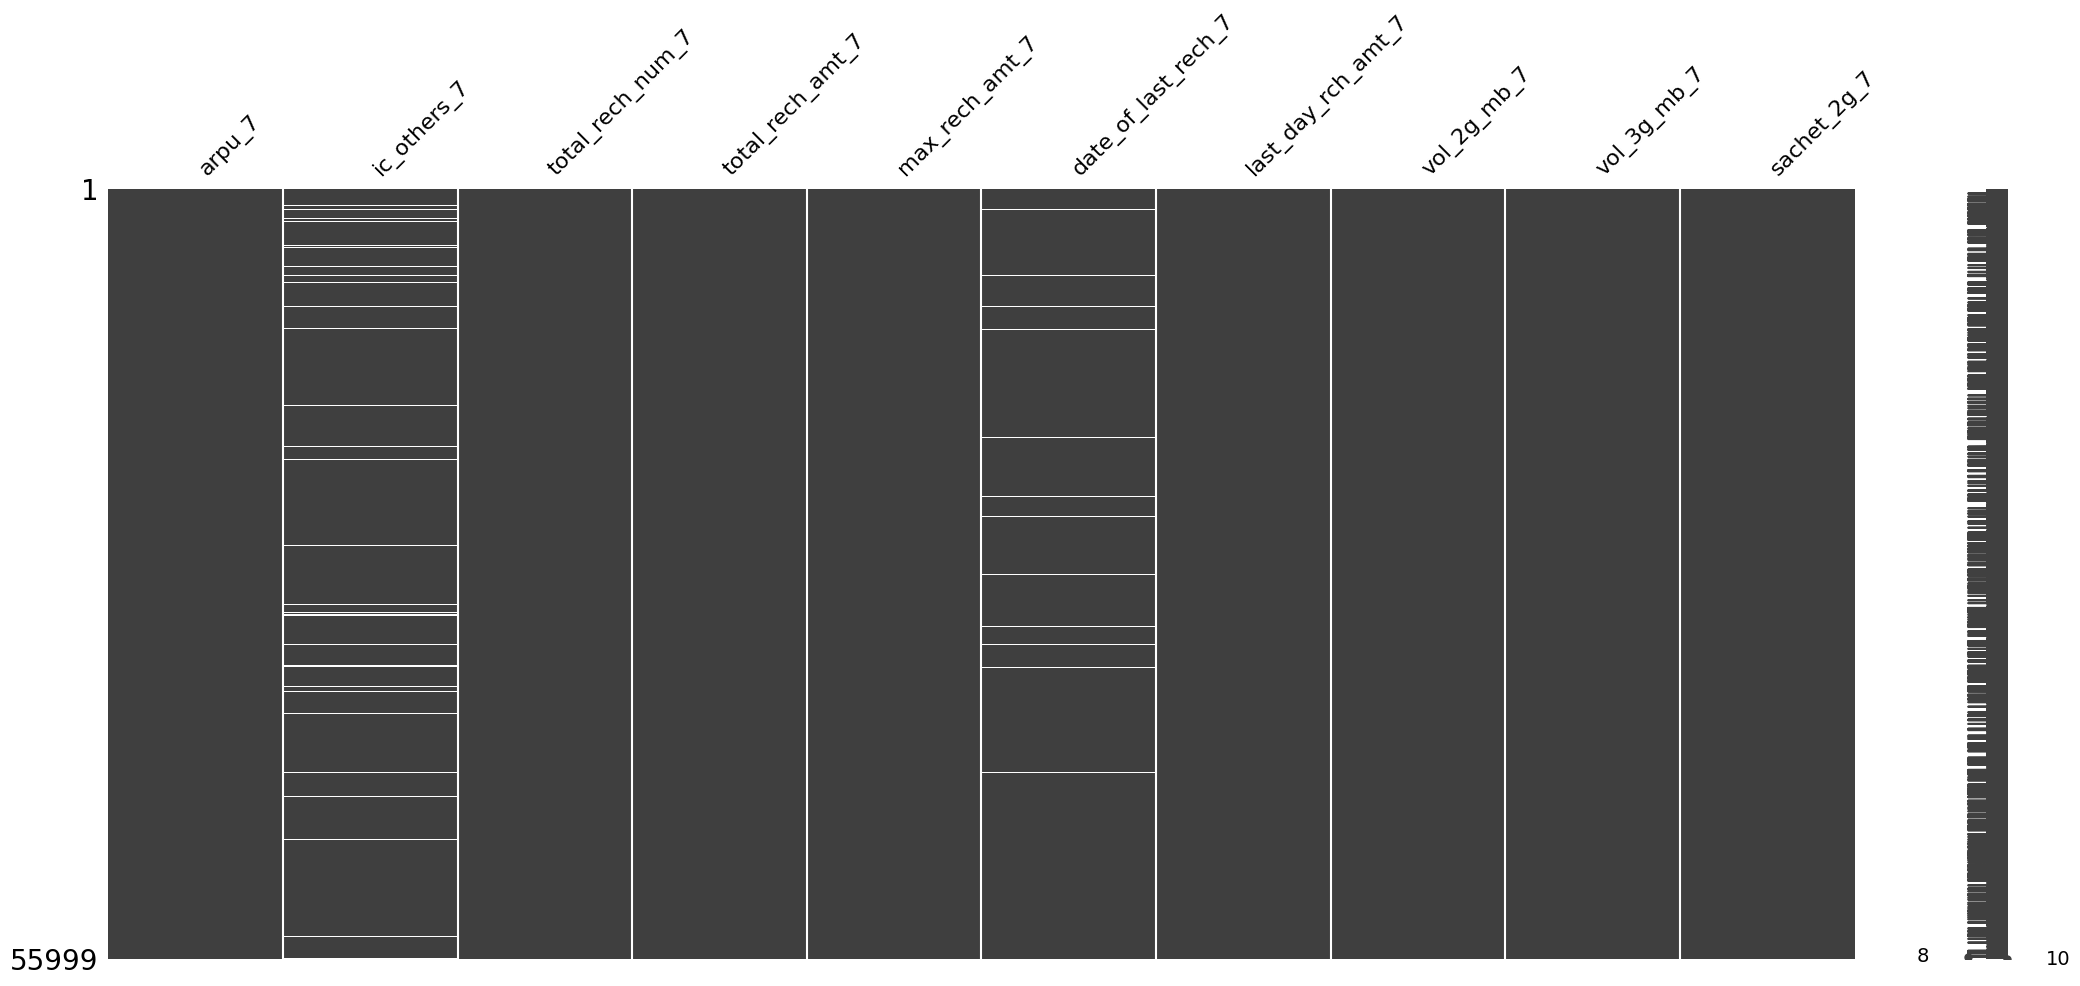

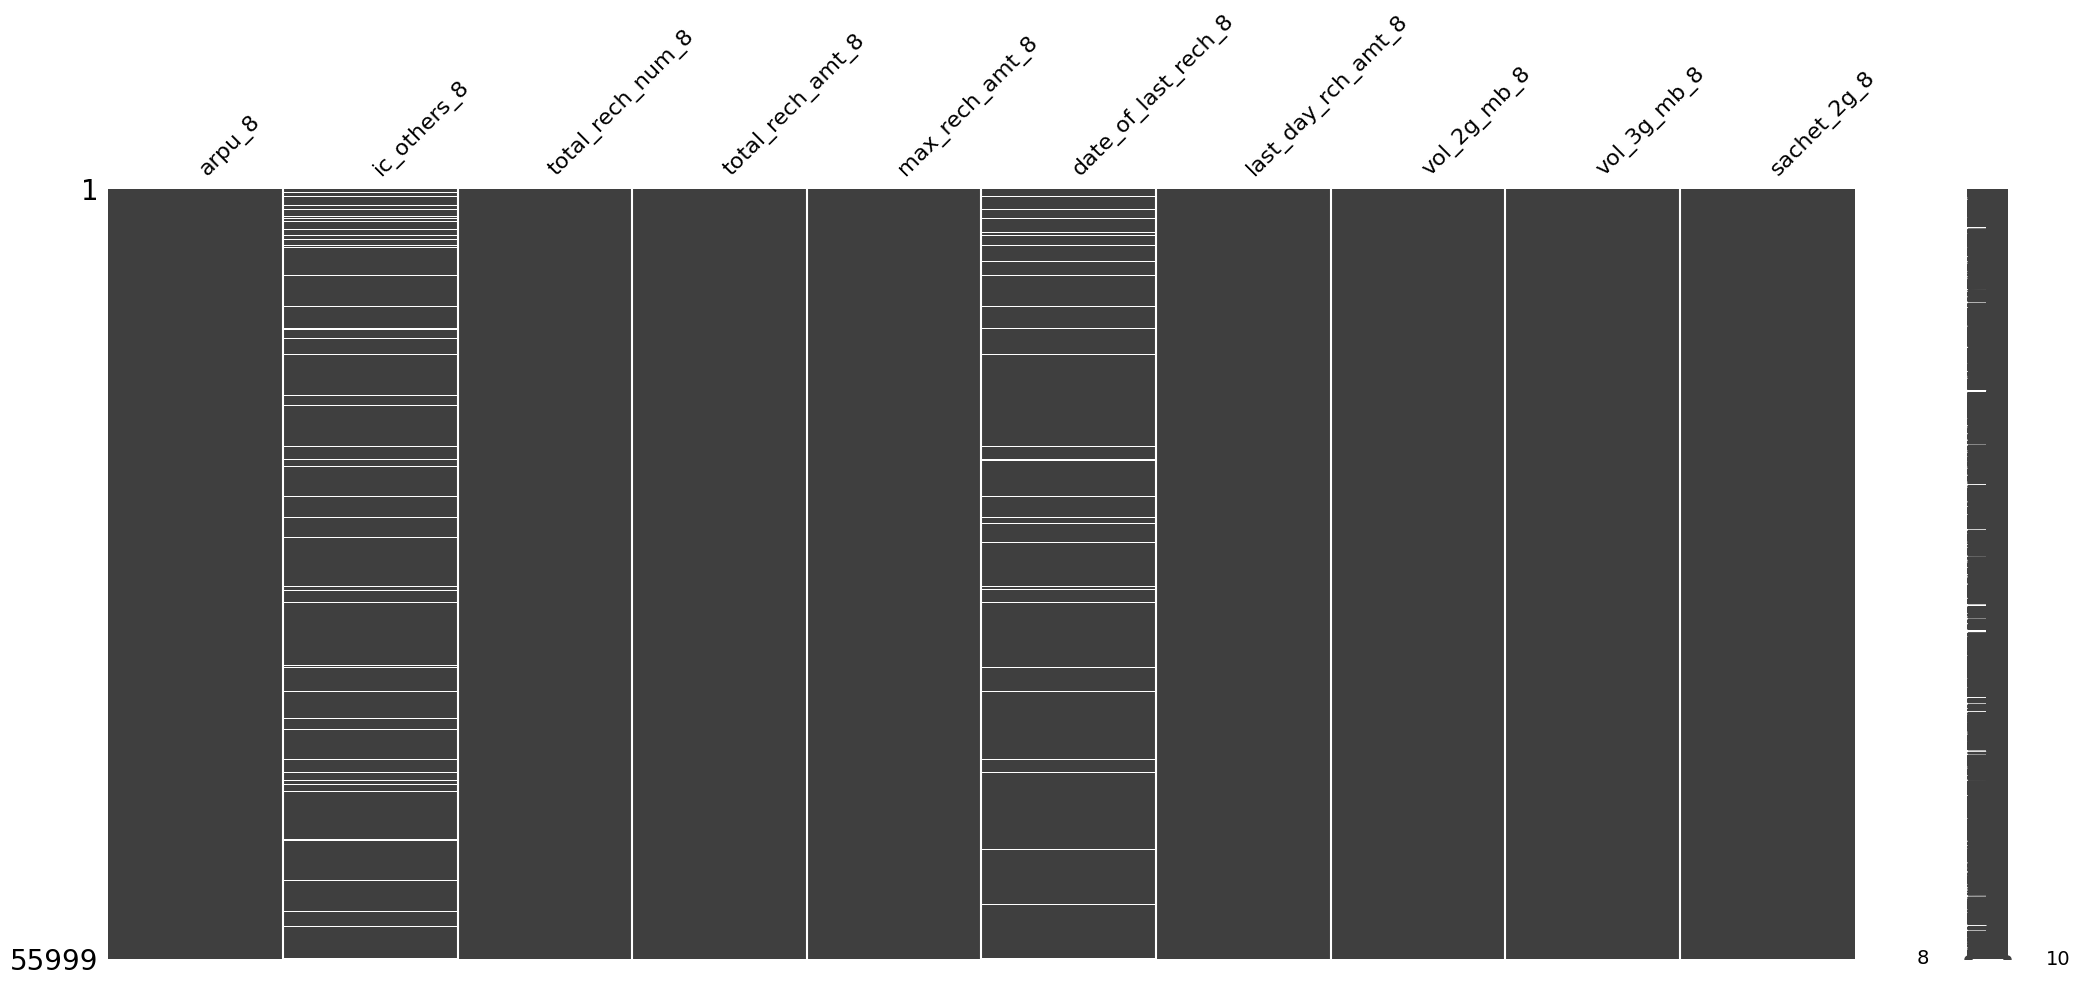

In [167]:
# Identify the variables that are related to the date_of_last_rech variable.
msno.matrix(X_train[[i for i in X_train.columns if re.search(r'^(?!.*mou).*6$',i)]])
msno.matrix(X_train[[i for i in X_train.columns if re.search(r'^(?!.*mou).*7$',i)]])
msno.matrix(X_train[[i for i in X_train.columns if re.search(r'^(?!.*mou).*8$',i)]])

- There 4 variables that related to the date_of_last_rech variable
- Examinate those variables

In [235]:
print('Unique values of other recharge columns with null values in the date_of_last_rech column:\n')

rech_cols_6 = [i for i in X_train.columns if re.search(r'^(?!.*mou).*(rech|rch).*6$',i)]
print('June 2014:') 
display({i: X_train[X_train[rech_cols_6].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_6})

rech_cols_7 = [i for i in X_train.columns if re.search(r'^(?!.*mou).*(rech|rch).*7$',i)]
print('July 2014:') 
display({i: X_train[X_train[rech_cols_7].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_7})

rech_cols_8 = [i for i in X_train.columns if re.search(r'^(?!.*mou).*(rech|rch).*8$',i)]
print('August 2014:') 
display({i: X_train[X_train[rech_cols_8].isna().any(axis=1)][i].unique().tolist() for i in rech_cols_8})

Unique values of other recharge columns with null values in the date_of_last_rech column:

June 2014:


{'total_rech_num_6': [0],
 'total_rech_amt_6': [0],
 'max_rech_amt_6': [0],
 'date_of_last_rech_6': [NaT],
 'last_day_rch_amt_6': [0]}

July 2014:


{'total_rech_num_7': [0],
 'total_rech_amt_7': [0],
 'max_rech_amt_7': [0],
 'date_of_last_rech_7': [NaT],
 'last_day_rch_amt_7': [0]}

August 2014:


{'total_rech_num_8': [0],
 'total_rech_amt_8': [0],
 'max_rech_amt_8': [0],
 'date_of_last_rech_8': [NaT],
 'last_day_rch_amt_8': [0]}

- The unique values of those columns are all zeros.
- In other words, there were no recharges happened within those months.
- Consequently, the null values should be imputed using MICE technique.

In [259]:
# For installing missingno library, type this command in terminal
# pip install miceforest
# code gotten fromhttps://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values
from miceforest import ImputationKernel

# initialize ImputationKernel
mice_kernel = ImputationKernel(data = X_train, save_all_iterations = True, random_state = 42)

#  runs the MICE algorithm on the input data with 2 iterations.
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float32]'>)

#### Investigate mou variables

<Axes: >

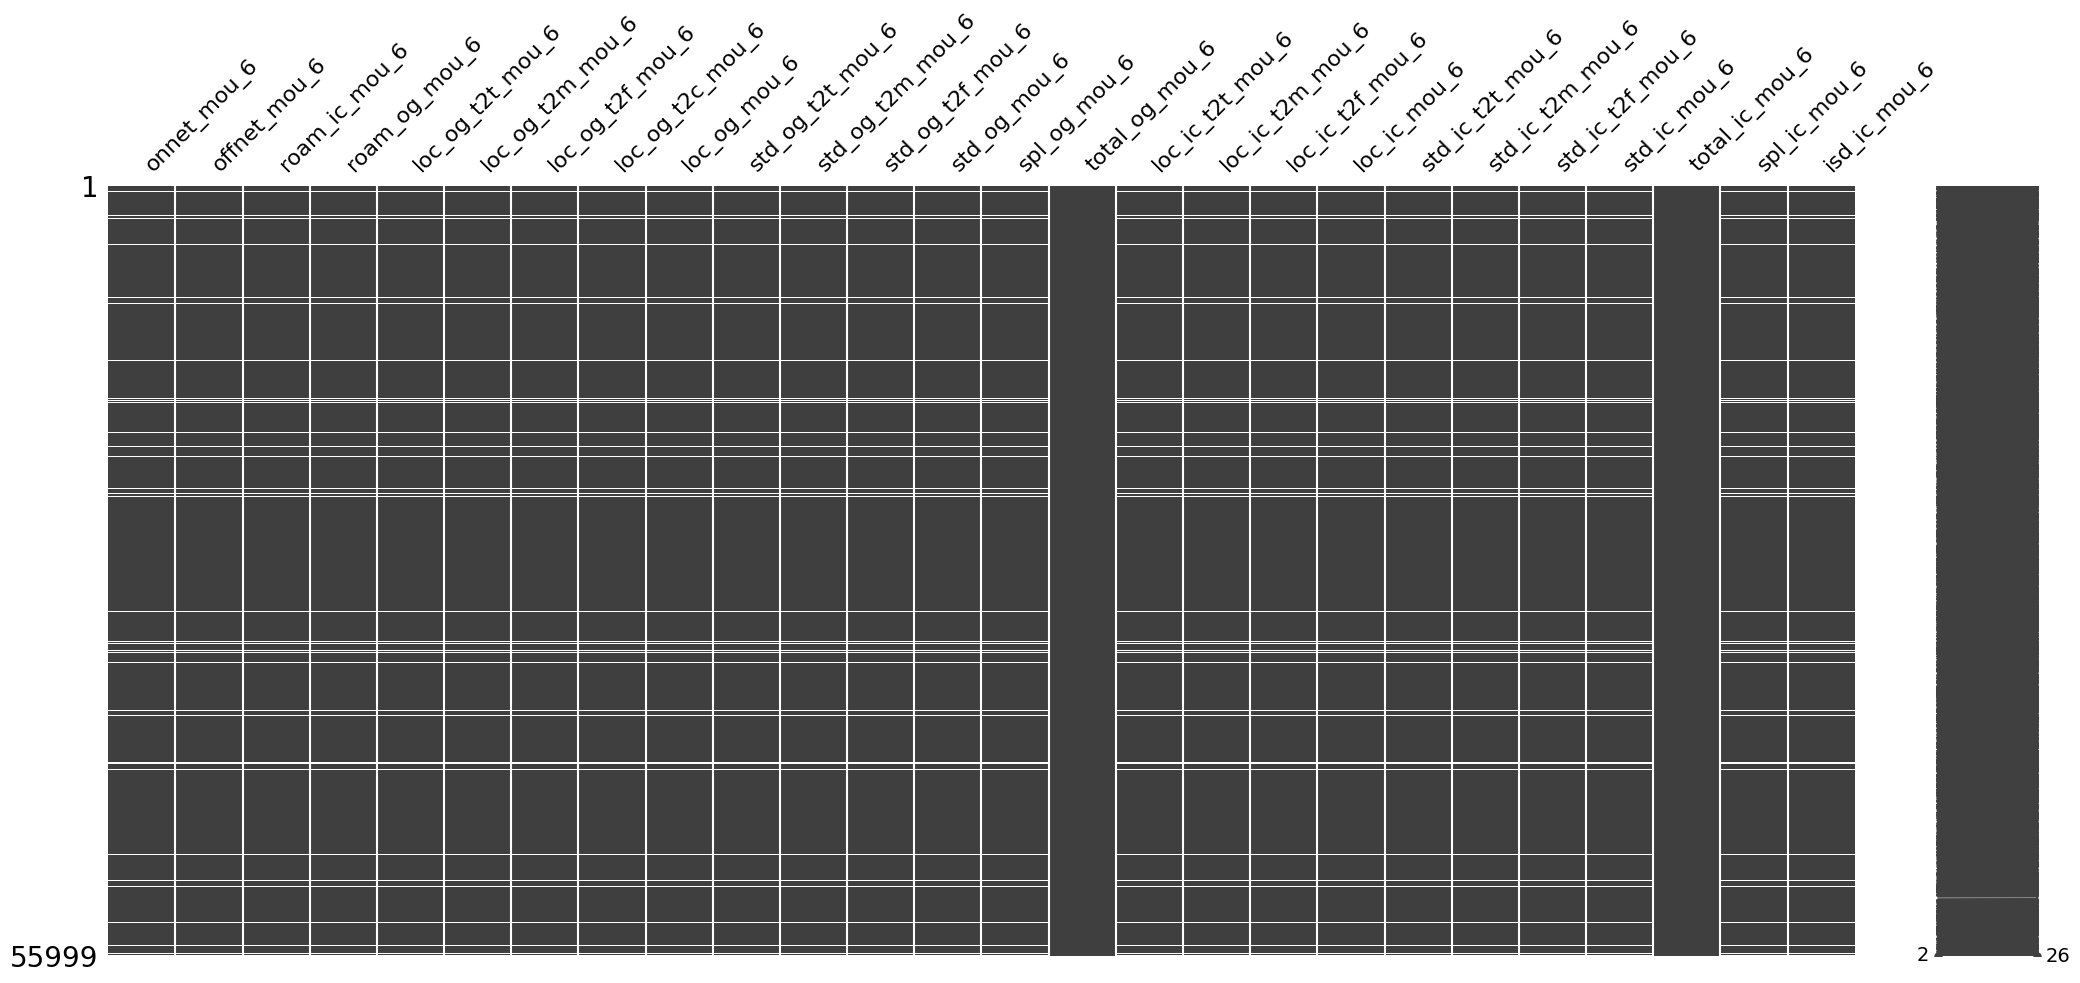

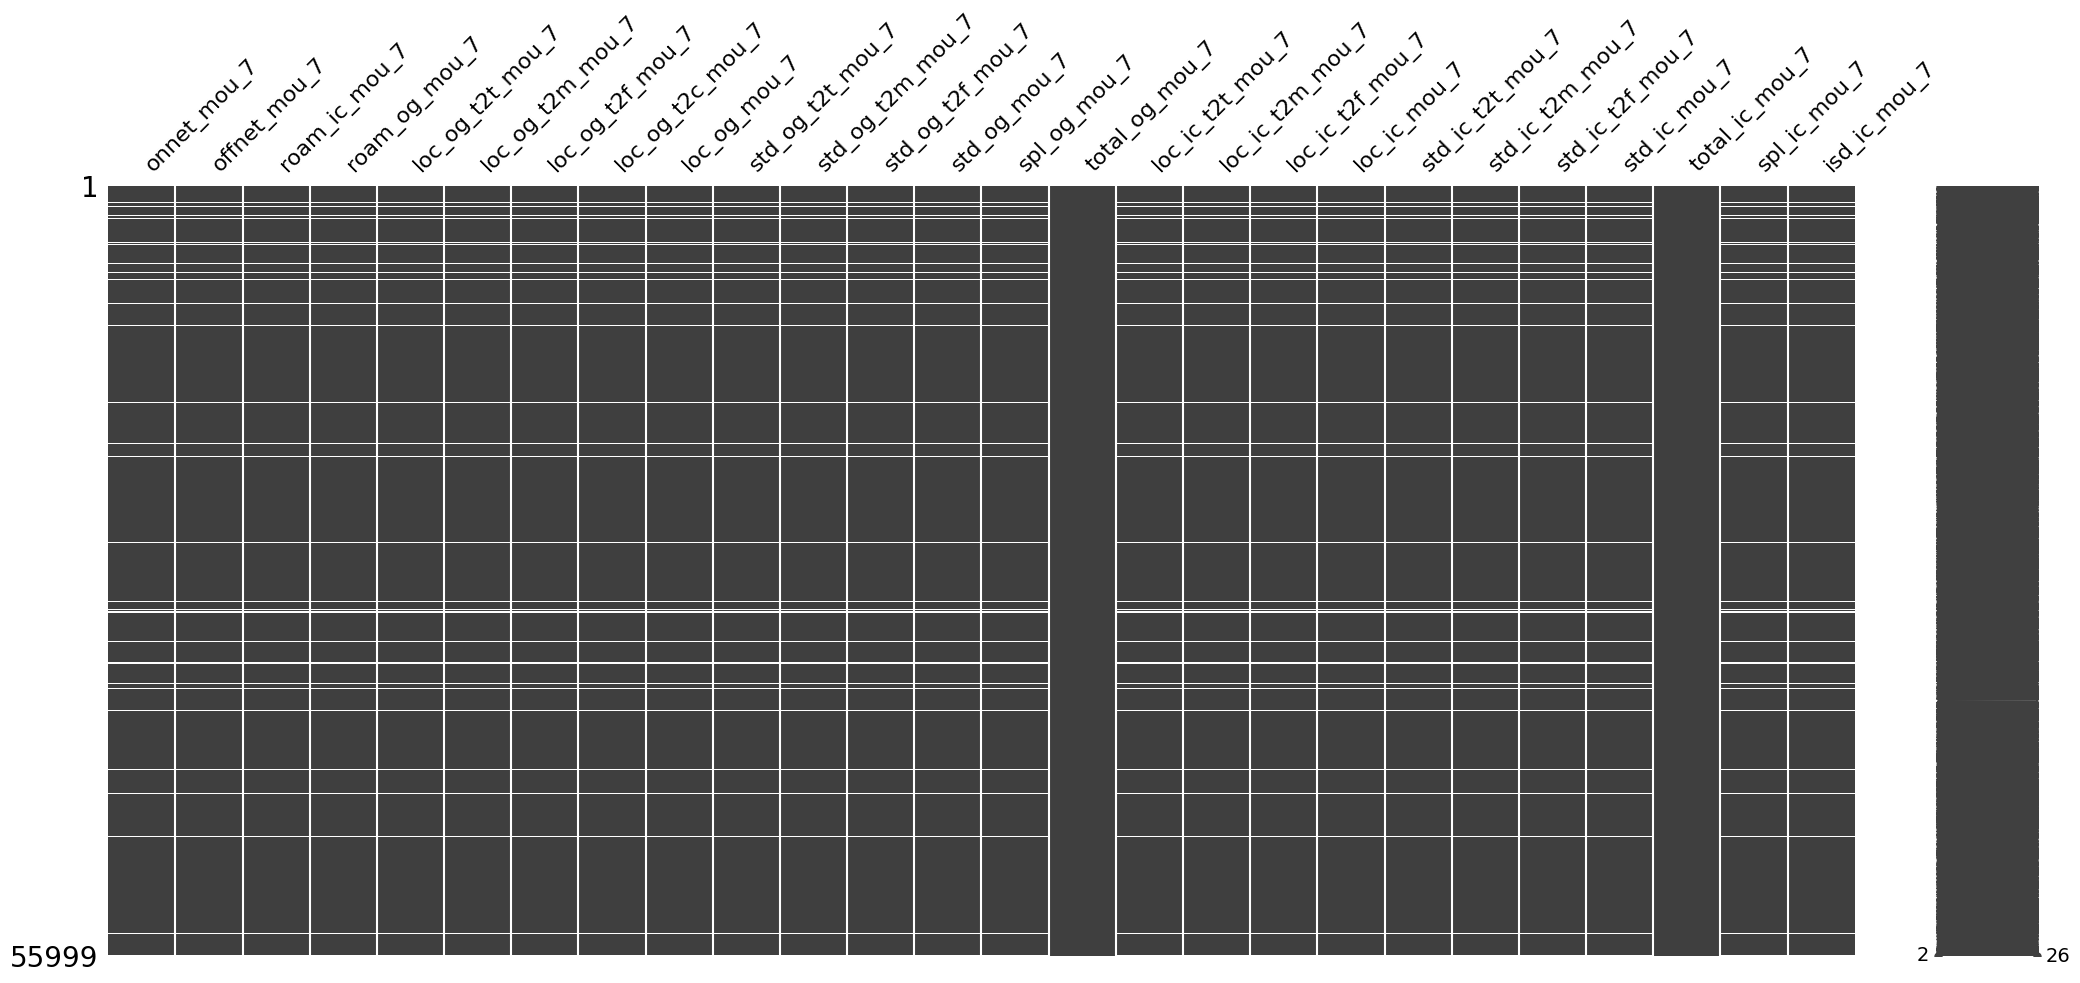

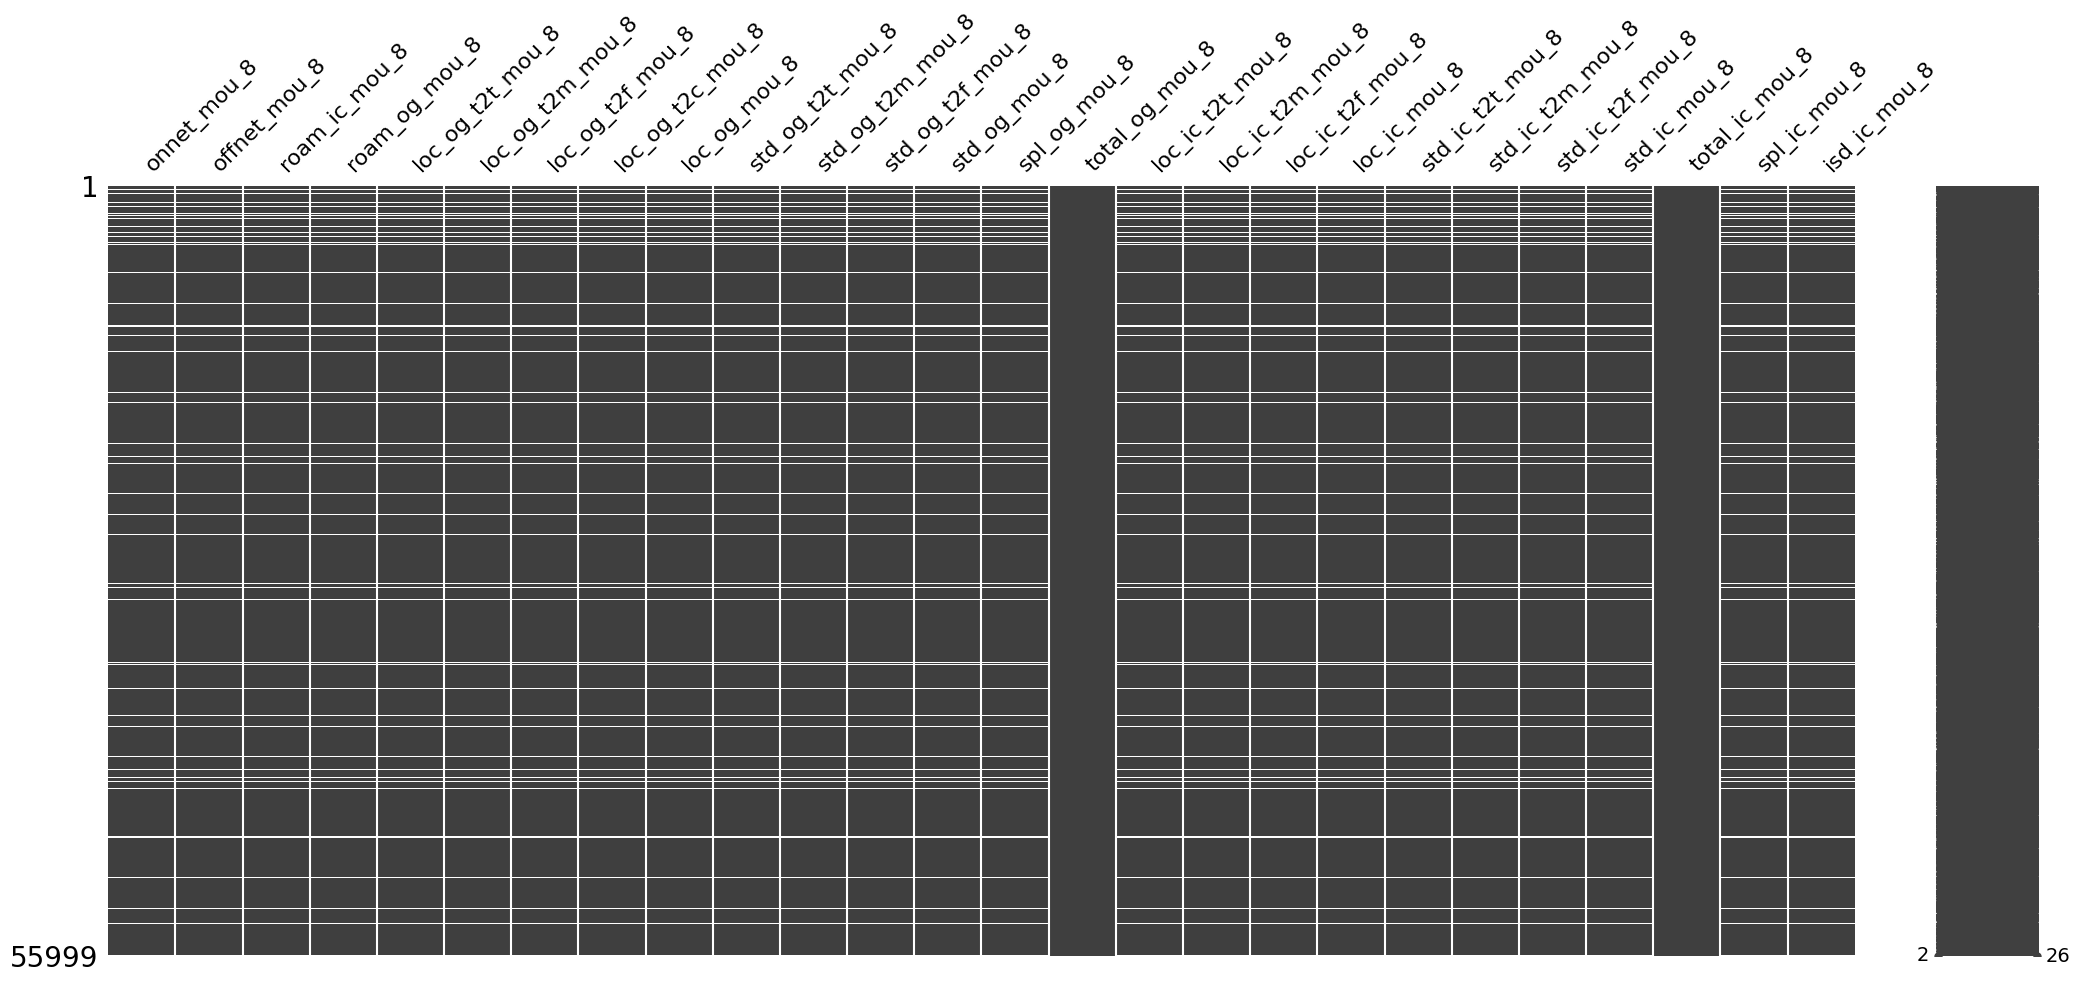

In [25]:
# Visualize the distribution of missing values in the MOU (minutes of phone call usage) variables for each month.
msno.matrix(X_train[[i for i in (X_train.columns) if re.search(r'mou_6', i)]])
msno.matrix(X_train[[i for i in (X_train.columns) if re.search(r'mou_7', i)]])
msno.matrix(X_train[[i for i in (X_train.columns) if re.search(r'mou_8', i)]])

- Only total mou columns are free of nulls
- investigate those columns

In [227]:
print('Unique values of the "total" columns with null values in other "mou" columns')

uniq_mising_total_6 = [i for i in (X_train.columns) if re.search(r'^total.*.mou_6$|onnet_mou_6', i)]
display({i: X_train[X_train[uniq_mising_total_6].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_6})

uniq_mising_total_7 = [i for i in (X_train.columns) if re.search(r'^total.*.mou_7$|onnet_mou_7', i)]
display({i: X_train[X_train[uniq_mising_total_7].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_7})

uniq_mising_total_8 = [i for i in (X_train.columns) if re.search(r'^total.*.mou_8$|onnet_mou_8', i)]
display({i: X_train[X_train[uniq_mising_total_8].isna().any(axis=1)][i].unique().tolist() for i in uniq_mising_total_8})


Unique values of the "total" columns with null values in other "mou" columns


{'onnet_mou_6': [nan], 'total_og_mou_6': [0.0], 'total_ic_mou_6': [0.0]}

{'onnet_mou_7': [nan], 'total_og_mou_7': [0.0], 'total_ic_mou_7': [0.0]}

{'onnet_mou_8': [nan], 'total_og_mou_8': [0.0], 'total_ic_mou_8': [0.0]}

- The unique values of those columns are all zeros.
- In other words, there are no minutes of usage in those records.
- The null values should be imputed as zero.

#### others

<Axes: >

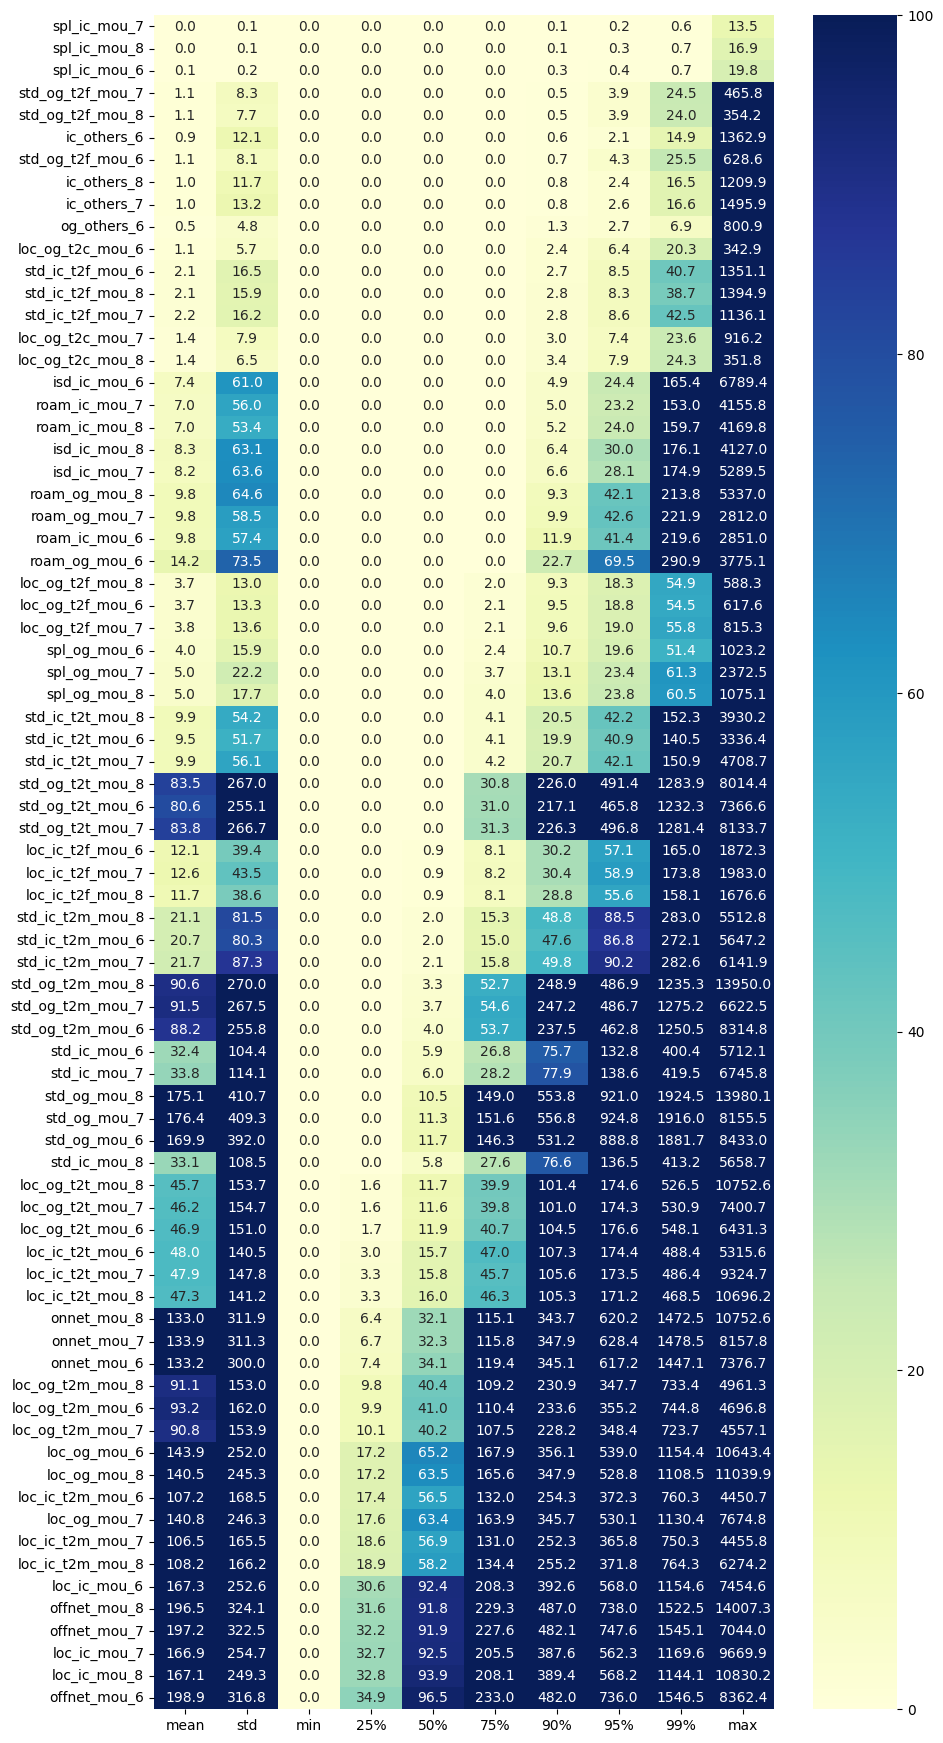

In [65]:
plt.figure(figsize=(10, 22))
sns.heatmap(data[null_cols].describe(include='all', percentiles=[.25, .75, .9, .95, .99]).transpose().drop(columns='count').sort_values(by=['25%', '50%', '75%', '90%']),
            annot=True,  fmt=".1f", cmap='YlGnBu', vmin=0, vmax=100) # code gotten from https://stackoverflow.com/questions/33779748/set-max-value-for-color-bar-on-seaborn-heatmap


#### Analyze outliers
